# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

This notebook provides an introduction to Dandiset 001333, focusing on exploring electrophysiological signals (LFP) within a simulated dataset.

**Note:** This notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results and are encouraged to consult the original data and documentation.

## Dandiset Overview

Dandiset 001333, titled "Parkinson's Electrophysiological Signal Dataset (PESD)", contains electrophysiological signals from both healthy and parkinsonian subjects (simulated in this case). The dataset includes Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) signals from the Subthalamic Nucleus (STN). The data is intended for research on Parkinson's Disease and the development of closed-loop deep brain stimulation.

You can find more information about this Dandiset on the DANDI archive:
[https://dandiarchive.org/dandiset/001333/0.250327.2220](https://dandiarchive.org/dandiset/001333/0.250327.2220)

## Notebook Contents

This notebook will cover:

1. Loading the Dandiset using the DANDI API.
2. Loading and inspecting an NWB file.
3. Visualizing a subset of the LFP data.
4. Summarizing findings and future directions.

## Required Packages

This notebook requires the following Python packages:

* h5py
* pynwb
* matplotlib
* numpy
* remfile
* itertools (standard library)
* dandi

It is assumed that these packages are already installed in your environment.


In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dandiset

We can connect to the DANDI archive and access the Dandiset using the `dandi` Python client.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## Loading and Inspecting an NWB file

We will now load one of the NWB files from the Dandiset. For this example, we will use the file `sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-001_ecephys.nwb` with asset ID `5409700b-e080-44e6-a6db-1d3e8890cd6c`. We can construct the direct download URL for this asset.

In [3]:
# NWB file URL used in this example
nwb_url = "https://api.dandiarchive.org/api/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/download/"

# Load the NWB file remotely
# Use remfile to open the remote file as a file-like object
remote_file = remfile.File(nwb_url)
# Open the file using h5py
h5_file = h5py.File(remote_file)
# Create an NWBHDF5IO object to read the NWB file
io = pynwb.NWBHDF5IO(file=h5_file)
# Read the NWB file object
nwb = io.read()

# Display some basic information about the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}")

NWB file identifier: 720ccaa6-61e7-4608-8c1c-c49a50b64fb0
Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-03-04 02:48:16.245113+00:00
Experimenter: ('Ananna Biswas',)
Subject ID: healthy_simulated_data


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Structure Overview

This NWB file contains electrophysiology data and associated metadata. A key part of the data is the Local Field Potential (LFP) which is stored within the `processing/ecephys/LFP` path in the NWB file. The electrode information is stored in the `electrodes` table.

Here is a simplified view of the relevant parts of the NWB file structure:

```
├── acquisition
├── analysis
├── general
│   ├── devices
│   ├── electrode_groups
│   ├── electrodes
│   └── subject
└── processing
    └── ecephys
        └── LFP
            └── ElectricalSeries
```

 The `ElectricalSeries` within `processing/ecephys/LFP` holds the LFP data, and the `electrodes` table under `general` provides details about the recording electrodes, such as location and group.


## Visualizing a Subset of LFP Data

We will now load a subset of the LFP data from the `ElectricalSeries` and plot it to visualize the signal. We will load the first 50000 samples for demonstration purposes. The data is stored as a 1D array.

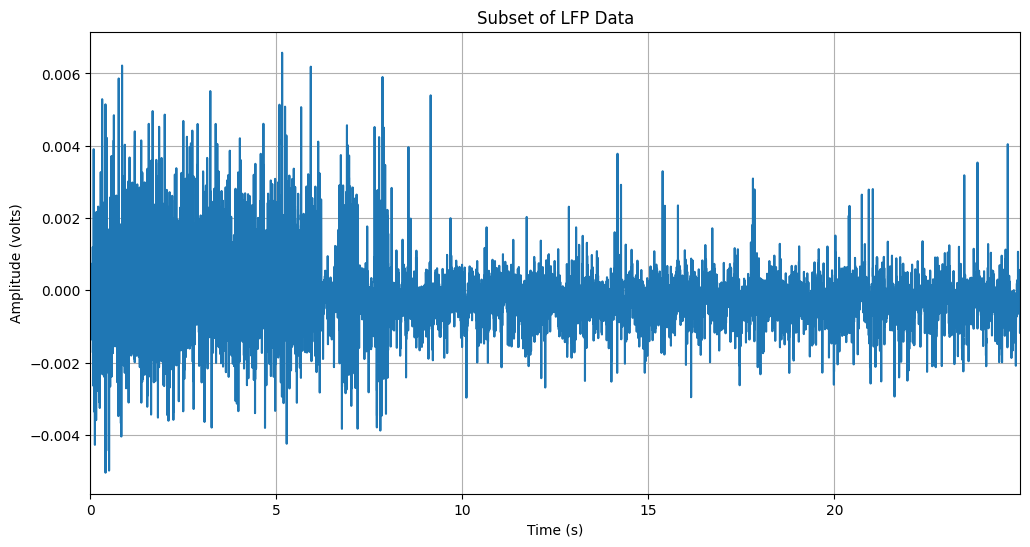

In [4]:
# Get LFP data ElectricalSeries object
lfp_electrical_series = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["LFP"]

# Get the data and rate
lfp_data = lfp_electrical_series.data
rate = lfp_electrical_series.rate

# Load a subset of data (e.g., first 50000 samples)
subset_size = 50000
lfp_subset = lfp_data[0:subset_size]
timestamps = np.arange(subset_size) / rate

# Plot the LFP subset
plt.figure(figsize=(12, 6))
plt.plot(timestamps, lfp_subset)

plt.xlabel("Time (s)")
plt.ylabel(f"Amplitude ({lfp_electrical_series.unit})")
plt.title("Subset of LFP Data")
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid(True)
plt.show()

You can explore this NWB file interactively using Neurosift:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/download/&dandisetId=001333&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/download/&dandisetId=001333&dandisetVersion=draft)

## Summarizing Findings and Future Directions

This notebook demonstrated how to access Dandiset 001333, load a simulated NWB file containing LFP data, and visualize a subset of that data. We observed the temporal dynamics of the LFP signal.

Possible future directions for analysis include:

* Analyzing the full LFP dataset.
* Performing spectral analysis on the LFP data to investigate power in different frequency bands, particularly the beta band (13-30 Hz) which is relevant to Parkinson's Disease as mentioned in the Dandiset description.
* Correlating LFP activity with other potential data streams if available in other NWB files within the Dandiset.
* Exploring the Beta ARV signals described in the Dandiset metadata.

This notebook serves as a starting point for exploring the rich electrophysiological data available in Dandiset 001333.


In [5]:
# Close the NWB file
io.close()